In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# analytic function r(x) calculated based on theory
def analytic(x):
    return np.sin(theta_0)/a * np.sin(a/np.cos(theta_0) * x)

# function for using in RK4
def f(x, y , omega):
    r, v = y
    return np.array([v, -omega**2 * r])


Text(0.5, 0, 'x ($m$)')

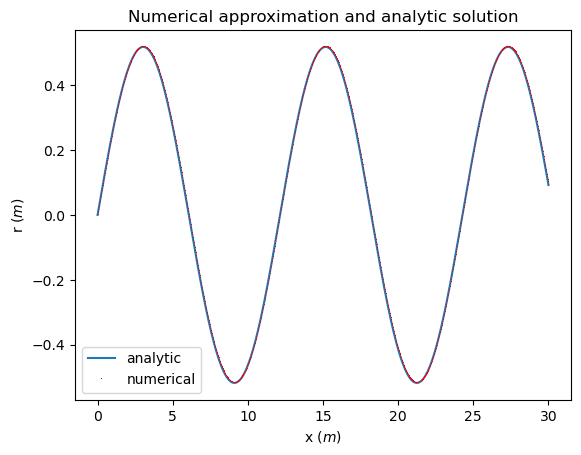

In [6]:

R = 1
a =   0.5*1/R
theta_0 = np.pi/12

omega = a/np.cos(theta_0)
r0 = 0
v0 = np.tan(theta_0)

N = 1000
x = np.linspace(0,30, N)


h = x[1]-x[0]

y = np.zeros((N,2))
y[0] = [r0,v0]

# Using RK4 
for i in range(N-1):
    k1 = f(x[i], y[i], omega)
    k2 = f(x[i] + h/2, y[i] + h*k1/2, omega)
    k3 = f(x[i] + h/2, y[i] + h*k2/2, omega)
    k4 = f(x[i] + h,   y[i] + h*k3,   omega)
    y[i+1] = y[i] + h*(k1 + 2*k2 + 2*k3 + k4)/6

r_analytic = analytic(x)
plt.plot(x, r_analytic, label='analytic')
plt.plot(x,y[:,0], 'r,', label='numerical')
plt.legend()
plt.title(r'Numerical approximation and analytic solution')
plt.ylabel('r ($m$)')
plt.xlabel('x ($m$)')

Text(0.5, 0, 'x ($m$)')

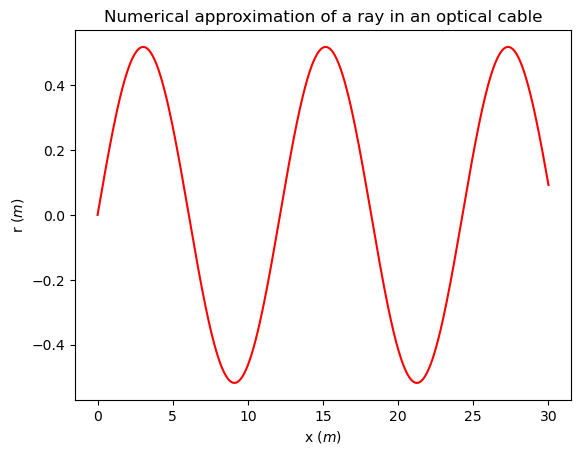

In [4]:
plt.plot(x,y[:,0],'r-', label='numerical')
plt.title(r'Numerical approximation of a ray in an optical cable')
plt.ylabel('r ($m$)')
plt.xlabel('x ($m$)')